# Logistic Regression: The Artificial Neuron

Previously, we predicted **values** (like stock prices). This is called *Regression*.<br>
Now, we want to predict **decisions** (Buy/Sell, Spam/Not Spam). This is called *Classification*.

We need a model that outputs a probability between 0 and 1. For this , we need a mathematical function called **sigmoid** function.

### 1. The Sigmoid Function
$$g(z) = \frac{1}{1 + e^{-z}}$$

* If $z$ is large positive $\rightarrow g(z) \approx 1$
* If $z$ is large negative $\rightarrow g(z) \approx 0$
* If $z = 0 \rightarrow g(z) = 0.5$ (The Decision Boundary)

### 2. The Cost Function: Log Loss

In Linear Regression, we used **Mean Squared Error (MSE)**.<br>
However, if we plug the Sigmoid function into MSE, the resulting cost curve becomes "wavy" (non-convex), meaning Gradient Descent would get stuck in local valleys.

To fix this, we use **Log Loss**. This function imposes an infinite penalty on "confident wrong answers."

$$J(\theta) = - \frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)}))]$$

**The Intuition:**
* **If the actual class is 1 ($y=1$):**
    * The cost is $-\log(h)$.
    * If $h \approx 1$ (Correct), Cost $\approx 0$.
    * If $h \approx 0$ (Wrong), Cost $\rightarrow \infty$.
* **If the actual class is 0 ($y=0$):**
    * The cost is $-\log(1-h)$.
    * If $h \approx 0$ (Correct), Cost $\approx 0$.
    * If $h \approx 1$ (Wrong), Cost $\rightarrow \infty$.

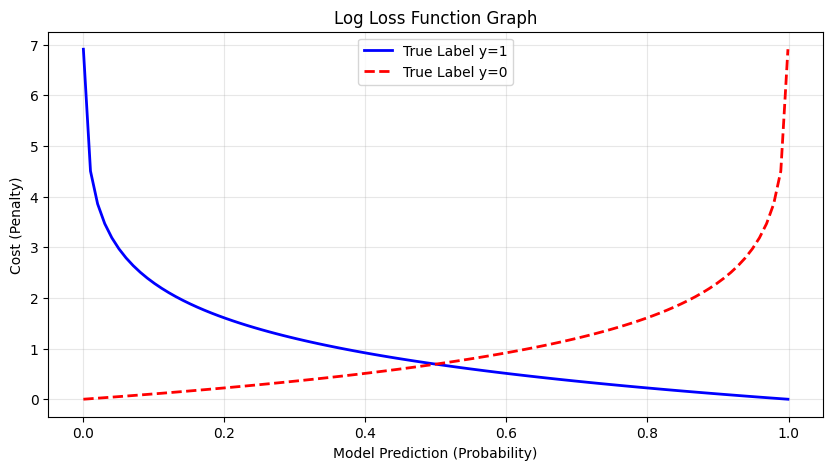

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Defining Log Loss for visualization
def log_loss_visual(h, y):
    if y == 1:
        return -np.log(h)
    else:
        return -np.log(1 - h)

# Generate predictions from 0.01 to 0.99
h_vals = np.linspace(0.001, 0.999, 100)

# Plot
plt.figure(figsize=(10, 5))

# Scenario A: The correct answer is 1 
plt.plot(h_vals, [log_loss_visual(h, 1) for h in h_vals], 'b-', linewidth=2, label='True Label y=1')

# Scenario B: The correct answer is 0 
plt.plot(h_vals, [log_loss_visual(h, 0) for h in h_vals], 'r--', linewidth=2, label='True Label y=0')

plt.title("Log Loss Function Graph")
plt.xlabel("Model Prediction (Probability)")
plt.ylabel("Cost (Penalty)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### 3. Gradient Descent
Amazingly, the derivative of the Log Loss function results in a gradient update rule that looks **identical** to Linear Regression.

$$\frac{\partial J}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

The only difference is that $h_\theta(x)$ is now the **Sigmoid** function, not a straight line.

### 3. Gradient Descent Implementation

We now minimize the Cost Function to find the best parameters ($\theta$).

**The Update Rule:**
Repeat until convergence:
$$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$$

**The Derivative:**
Remarkably, the derivative of the Log Loss function leads to a gradient formula that is **identical** to Linear Regression:
$$\frac{\partial J}{\partial \theta} = \frac{1}{m} X^T (h_\theta(X) - y)$$

*Note: While the formula looks the same, the definition of $h_\theta(X)$ has changed from linear ($X\theta$) to sigmoid ($\frac{1}{1+e^{-X\theta}}$).*

In [4]:

# --- 1. DATA GENERATION ---
np.random.seed(42)
m = 100
# Class 0 (Sell): Centered at (-2, -2)
X0 = np.random.randn(m//2, 2) - 2
y0 = np.zeros((m//2, 1))
# Class 1 (Buy): Centered at (2, 2)
X1 = np.random.randn(m//2, 2) + 2
y1 = np.ones((m//2, 1))

# Combine and Shuffle
X = np.vstack((X0, X1))
y = np.vstack((y0, y1))

# Add Bias Term (Intercept)
X_b = np.c_[np.ones((m, 1)), X]

# --- 2. THE TRAINING LOOP ---
learning_rate = 0.1
iterations = 1000
theta = np.zeros((3, 1)) # Initialize [Bias, Weight1, Weight2]

loss_history = []

print(f"Start Loss: {float('inf')}")

for i in range(iterations):
    # A. Forward Pass (The Hypothesis)
    z = X_b @ theta
    h = 1 / (1 + np.exp(-z)) # Sigmoid Activation
    
    # B. Calculate Gradient
    # The direction we need to move to reduce error
    gradient = (1/m) * X_b.T @ (h - y)
    
    # C. Update Weights
    theta -= learning_rate * gradient
    
    # D. Track Cost (Log Loss)
    # Added 1e-15 to prevent log(0) errors
    cost = (-1/m) * np.sum(y * np.log(h + 1e-15) + (1-y) * np.log(1-h + 1e-15))
    loss_history.append(cost)
    
    if i % 100 == 0:
        print(f"Iter {i}: Cost {cost:.4f}")

print(f"\nFinal Theta (Weights):\n{theta}")

# --- 3. ACCURACY CHECK ---
# If probability >= 0.5, predict 1. Else 0.
predictions = (1 / (1 + np.exp(-(X_b @ theta))) >= 0.5).astype(int)
accuracy = np.mean(predictions == y) * 100
print(f"Final Accuracy: {accuracy:.2f}%")

Start Loss: inf
Iter 0: Cost 0.6931
Iter 100: Cost 0.0245
Iter 200: Cost 0.0141
Iter 300: Cost 0.0102
Iter 400: Cost 0.0081
Iter 500: Cost 0.0068
Iter 600: Cost 0.0058
Iter 700: Cost 0.0051
Iter 800: Cost 0.0046
Iter 900: Cost 0.0042

Final Theta (Weights):
[[0.03786727]
 [1.9458047 ]
 [1.93356534]]
Final Accuracy: 100.00%


### 4. The Decision Boundary
Where does the model draw the line between "Buy" and "Sell"?

The Decision Boundary is the line where the model is exactly 50% sure ($h_\theta(x) = 0.5$).
Mathematically, this happens when the input to the Sigmoid ($z$) is 0.

$$z = \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$

To plot this line, we solve for $x_2$:
$$x_2 = - \frac{\theta_0 + \theta_1 x_1}{\theta_2}$$

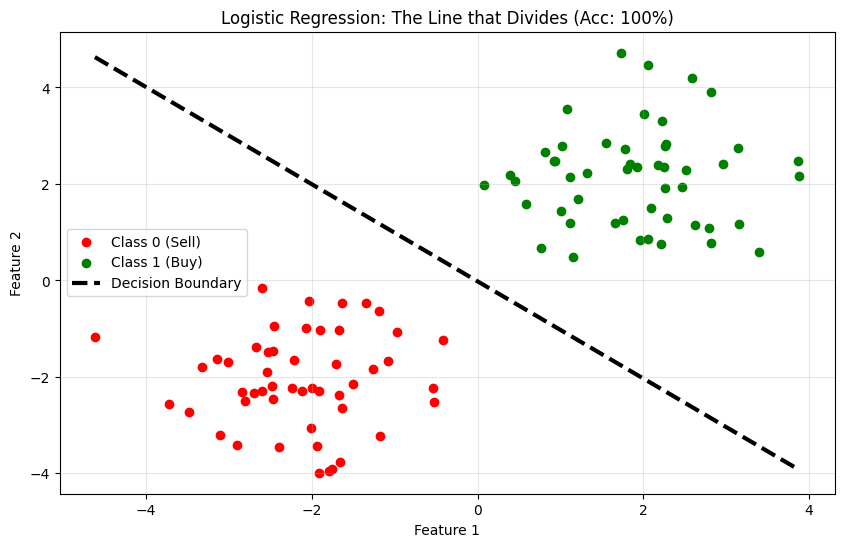

In [5]:
plt.figure(figsize=(10, 6))

# 1. Plot the Data Points
plt.scatter(X[y.ravel()==0, 0], X[y.ravel()==0, 1], color='red', label='Class 0 (Sell)')
plt.scatter(X[y.ravel()==1, 0], X[y.ravel()==1, 1], color='green', label='Class 1 (Buy)')

# 2. Plot the Decision Boundary Line
# Get range of x1 values (min to max)
x1_vals = np.array([X[:, 0].min(), X[:, 0].max()])
# Calculate corresponding x2 values using the formula derived above
x2_vals = -(theta[0] + theta[1]*x1_vals) / theta[2]

plt.plot(x1_vals, x2_vals, "k--", linewidth=3, label="Decision Boundary")

# 3. Cleanup
plt.title(f"Logistic Regression: The Line that Divides (Acc: {accuracy:.0f}%)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()